In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir())

['NoteBook_Modelisation.ipynb', 'Clean_Dataset_Brief.csv', 'NoteBook_Netoyage.ipynb', '.git', 'Guide.txt', 'note.txt', 'Dataset_Brief.csv', 'README.md', 'requirements.txt', 'NoteBook_Analyse.ipynb', 'checklist.ipynb', '.gitignore']


In [35]:
dataset_path = "Clean_Dataset_Brief.csv"
os.chdir('/home/utilisateur/projet/Assurance/Assurance_FE/')  # Specify the directory path without the file name
df_clean = pd.read_csv(dataset_path)

Analyse univariée de chaque variable.

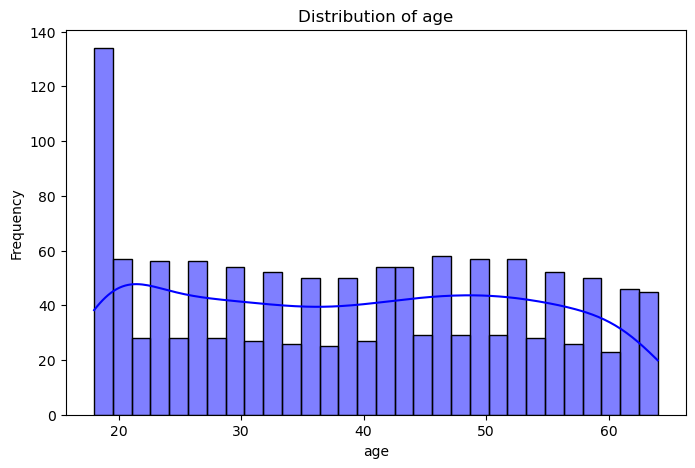

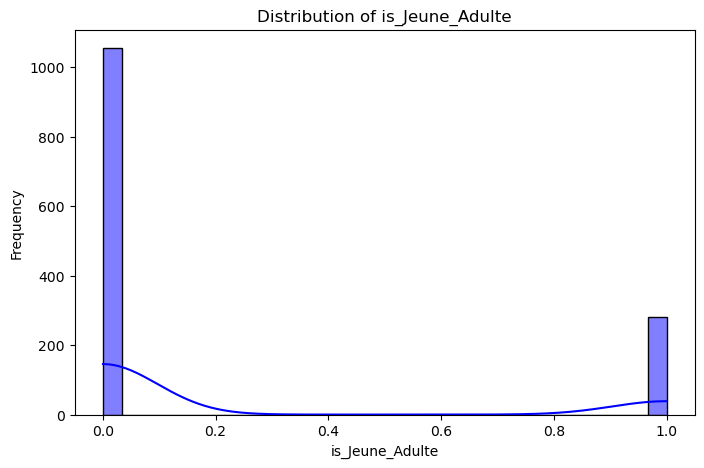

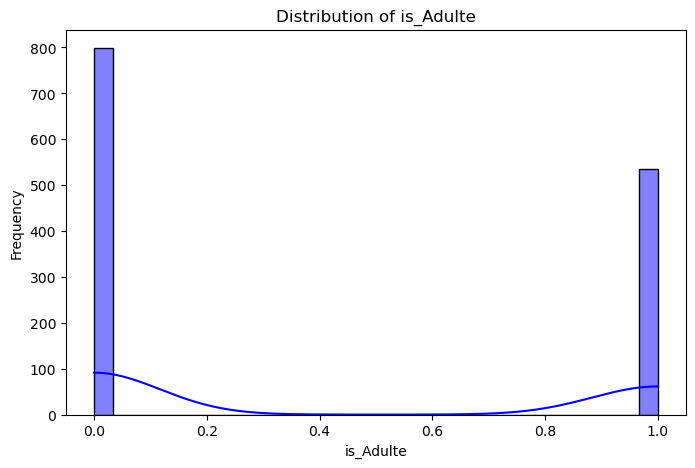

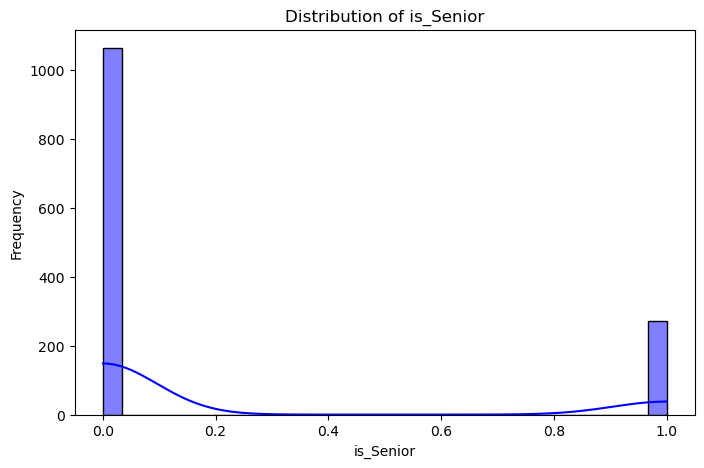

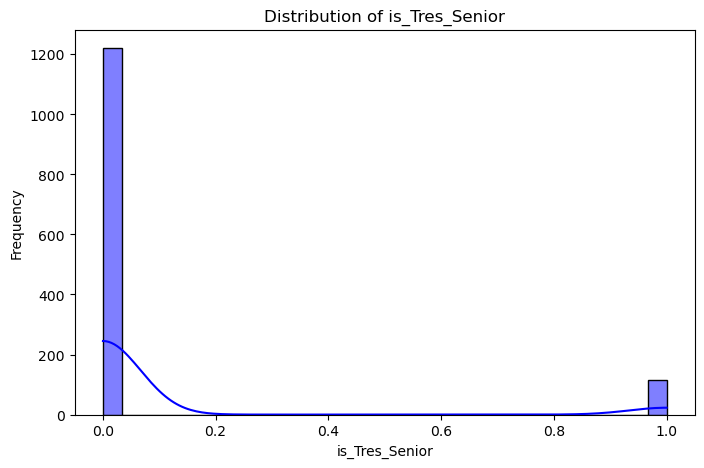

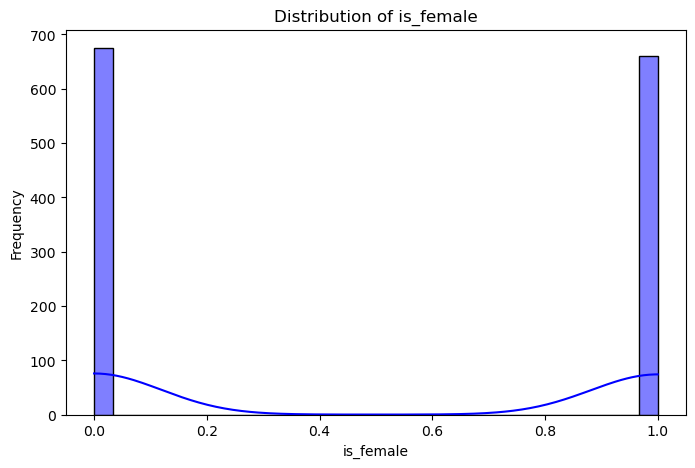

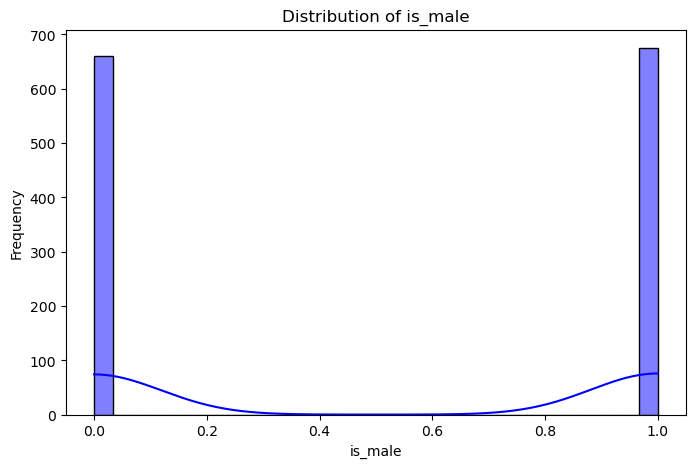

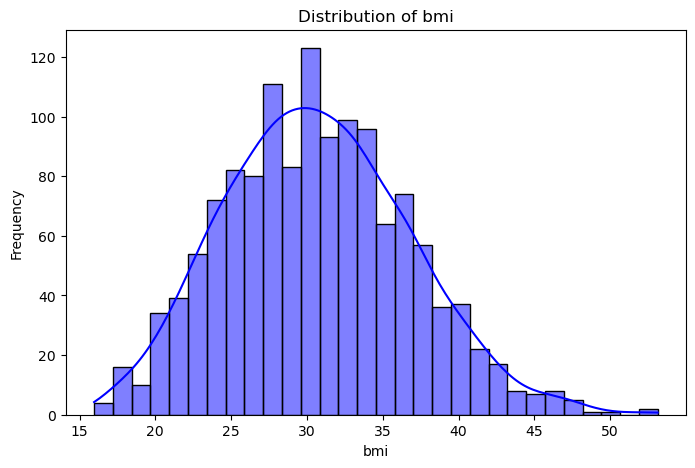

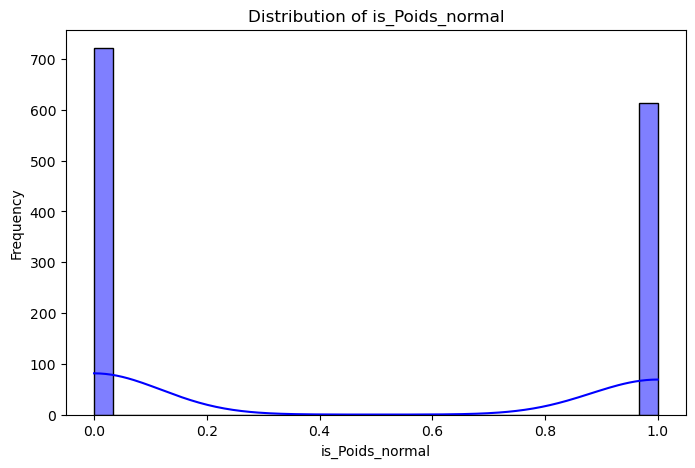

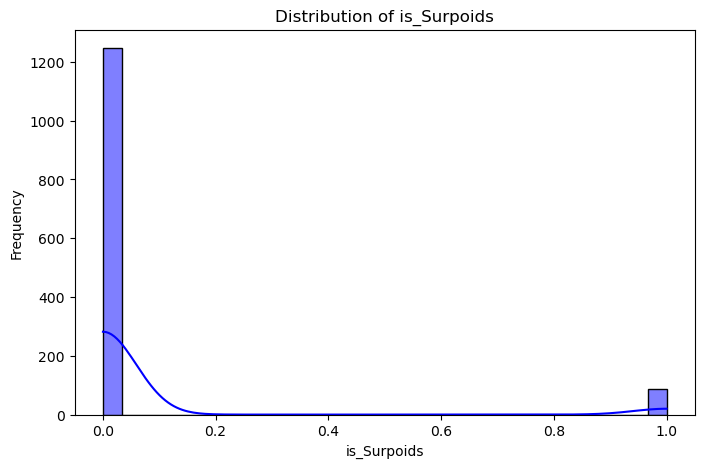

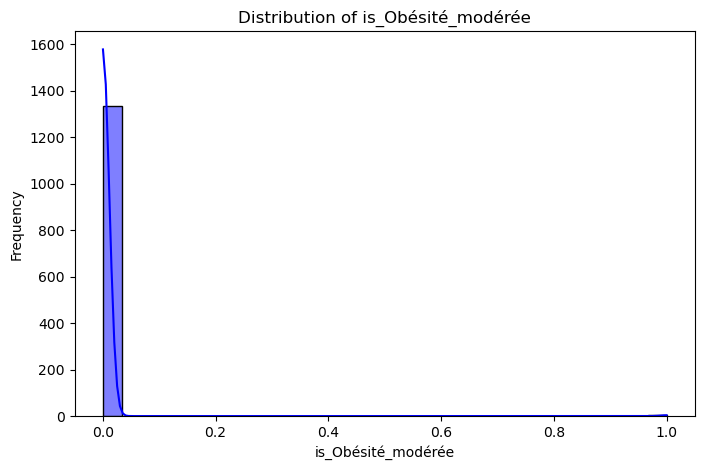

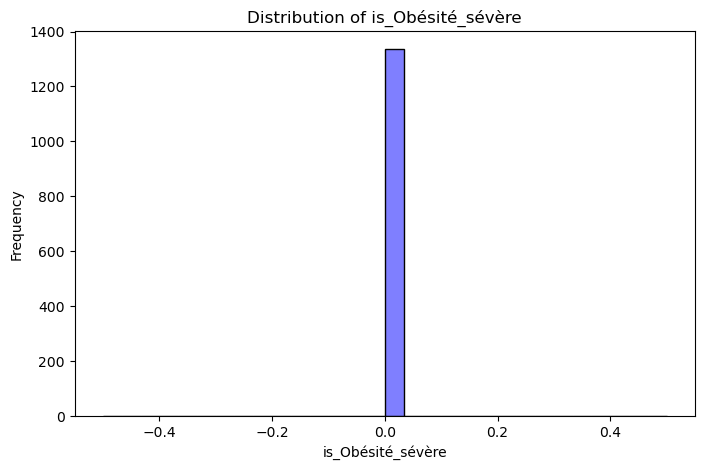

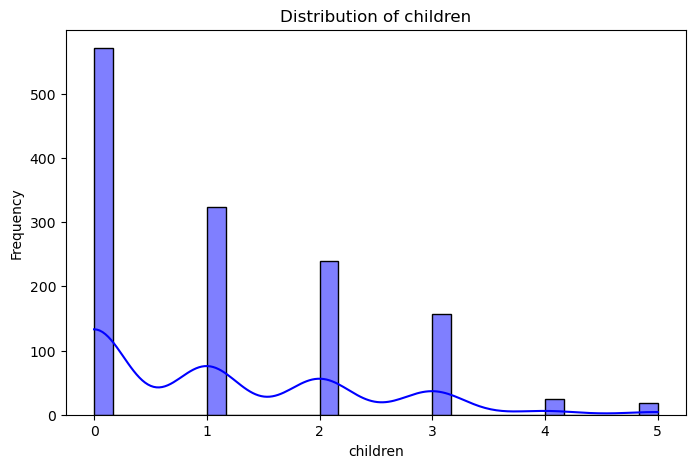

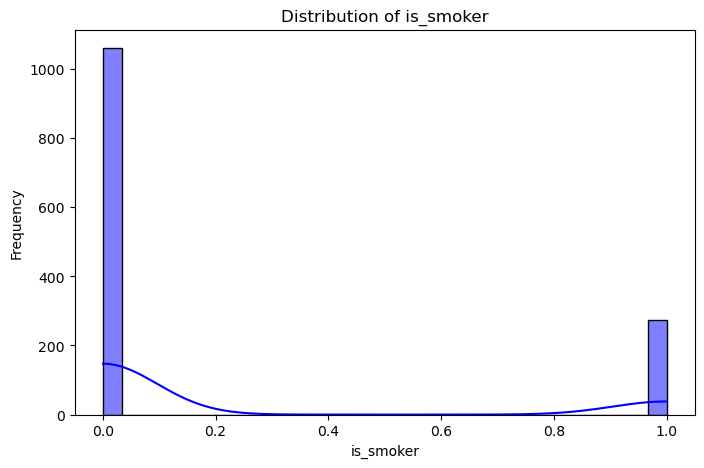

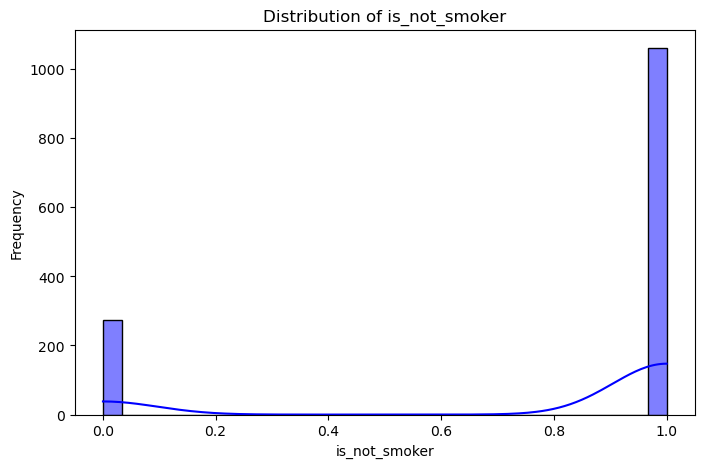

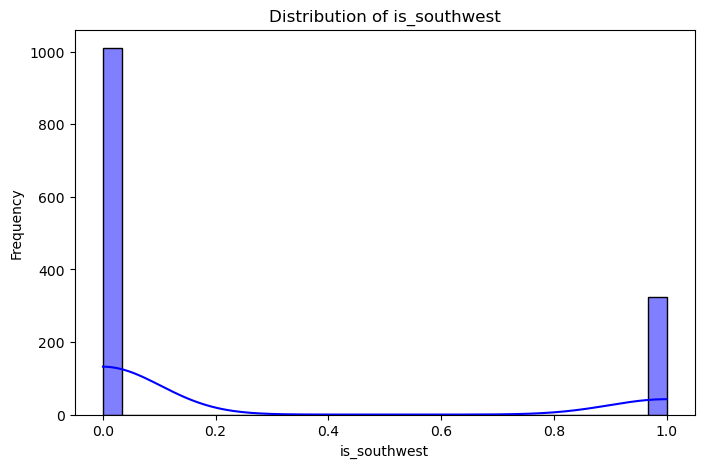

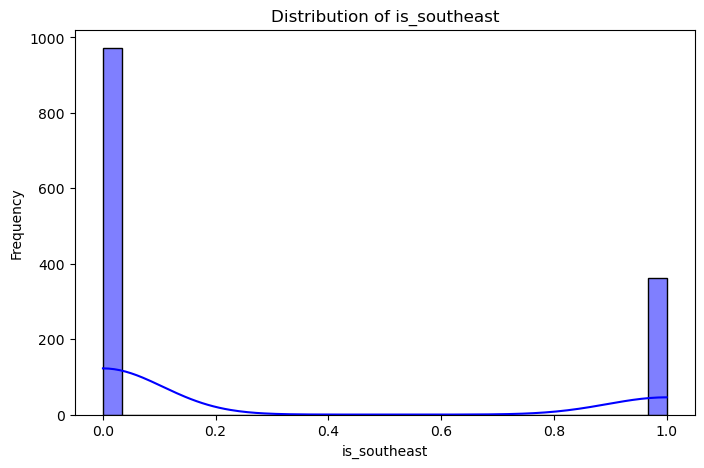

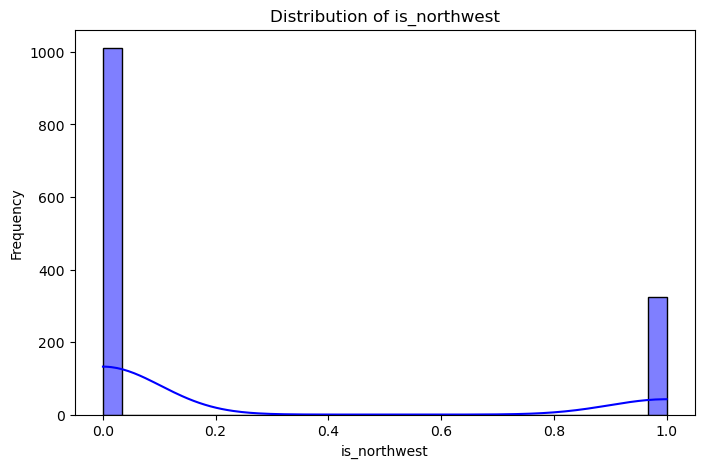

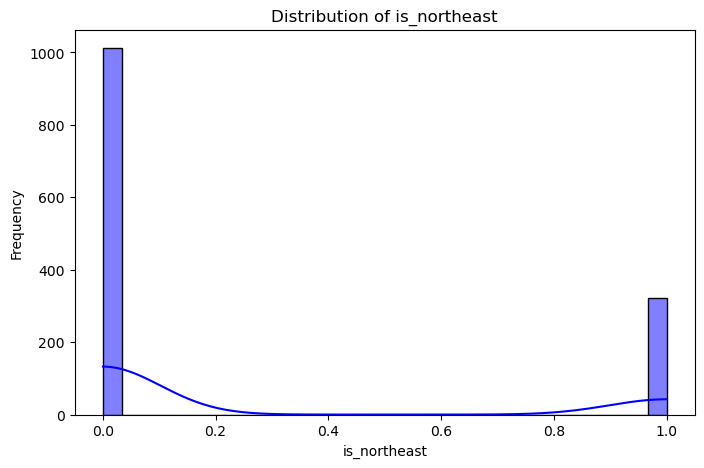

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the target variable
y_target = df_clean['charges']

# Remove the 'charges' column temporarily to avoid plotting it
df_clean_without_charges = df_clean.drop('charges', axis=1)

# Plot pie charts for categorical variables
categorical_columns = df_clean_without_charges.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    
    # Calculate percentage distribution
    distribution = df_clean[col].value_counts(normalize=True) * 100
    
    # Plot pie chart
    plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(distribution)))
    
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot histograms for numerical variables
numeric_columns = df_clean_without_charges.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_clean[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Étudier la corrélation des variables avec la variable cible.

In [37]:
# Initialize an empty dictionary to store correlations
correlation_dict = {}

# Iterate through each column in df_clean
for col in df_clean.columns:
    # Calculate the correlation with y_target
    correlation = df_clean[col].corr(y_target)
    
    # Store the correlation in the dictionary
    correlation_dict[col] = correlation

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])

# Display the DataFrame sorted by absolute correlation values
correlation_df['Absolute_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute_Correlation', ascending=False)

# Print the DataFrame
print(correlation_df)


               Feature  Correlation  Absolute_Correlation
19             charges     1.000000              1.000000
13           is_smoker     0.787313              0.787313
14       is_not_smoker    -0.787313              0.787313
0                  age     0.297956              0.297956
4       is_Tres_Senior     0.200860              0.200860
7                  bmi     0.198453              0.198453
8      is_Poids_normal     0.162009              0.162009
1      is_Jeune_Adulte    -0.158453              0.158453
3            is_Senior     0.133699              0.133699
9          is_Surpoids     0.077284              0.077284
16        is_southeast     0.073180              0.073180
12            children     0.066877              0.066877
5            is_female    -0.057468              0.057468
6              is_male     0.057468              0.057468
15        is_southwest    -0.044020              0.044020
17        is_northwest    -0.039074              0.039074
2            i

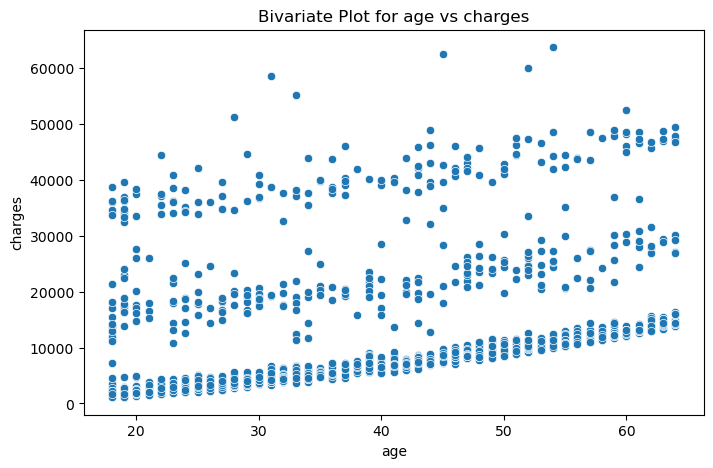

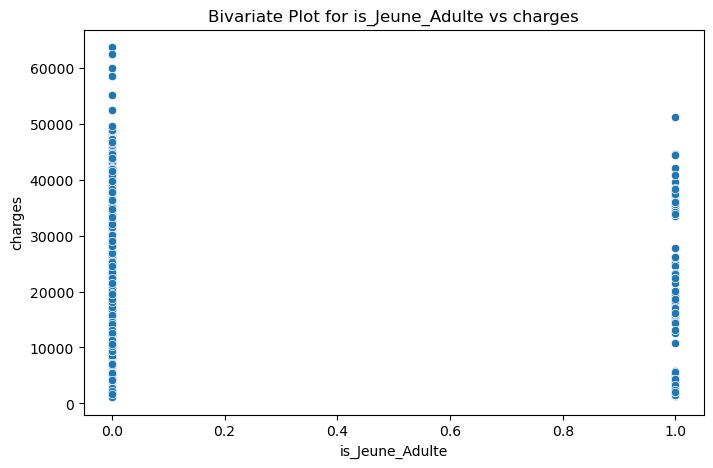

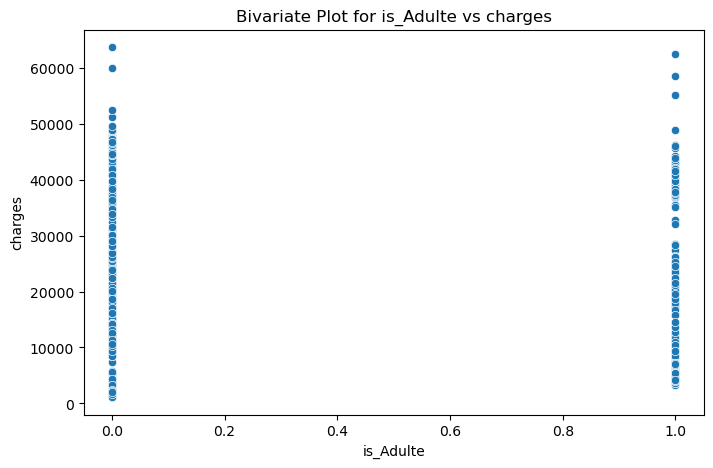

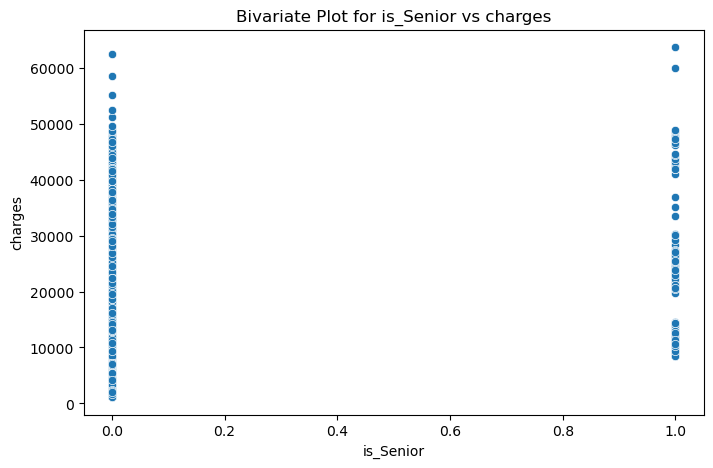

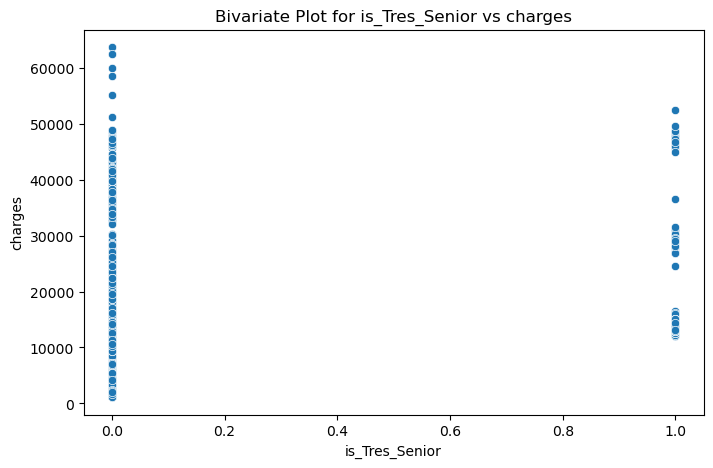

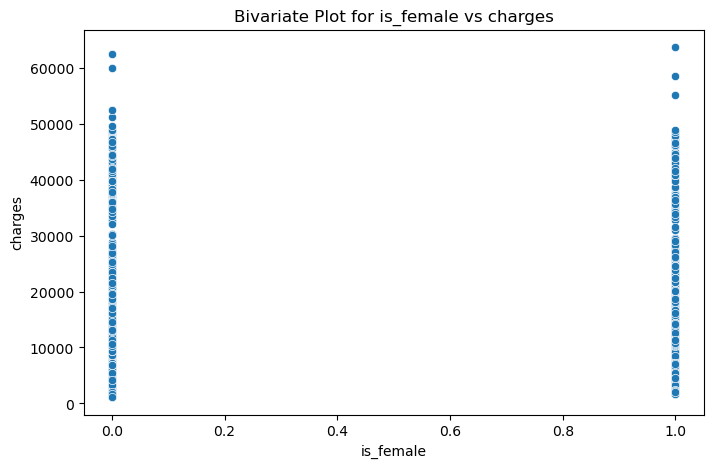

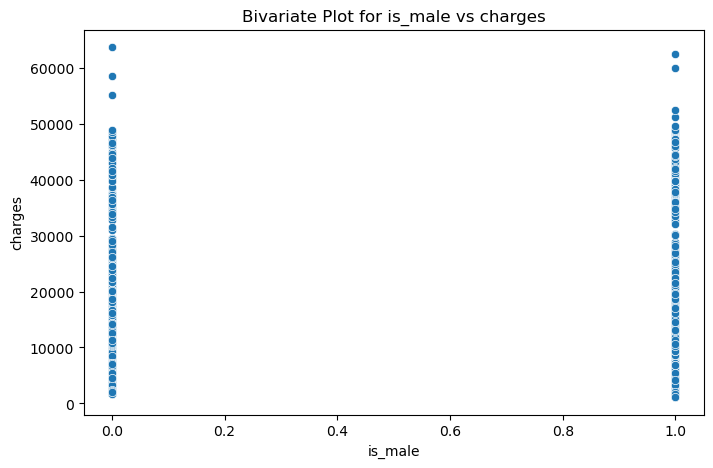

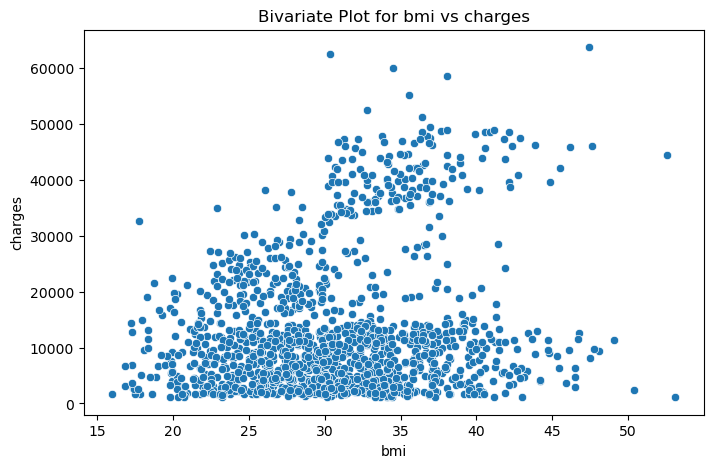

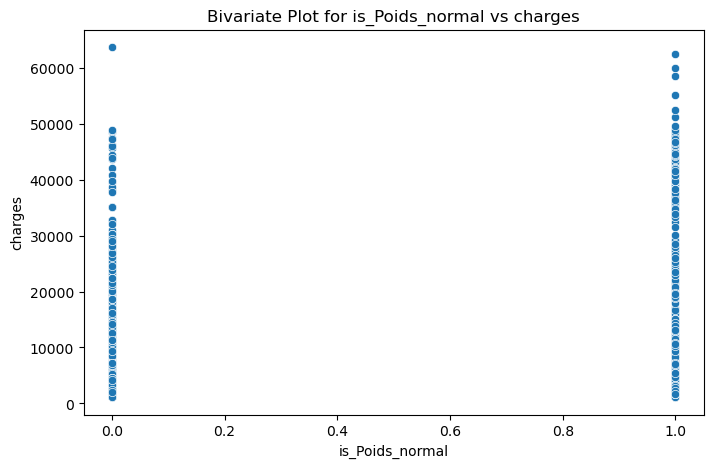

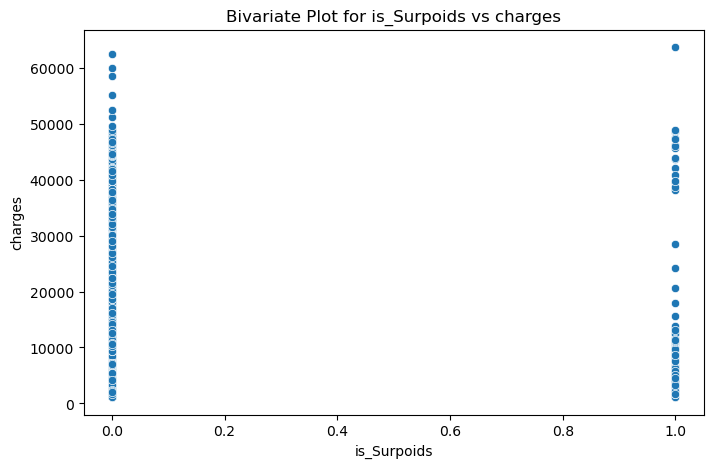

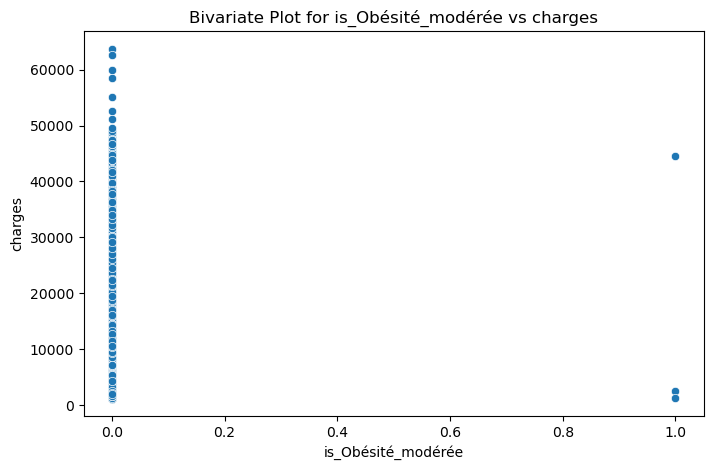

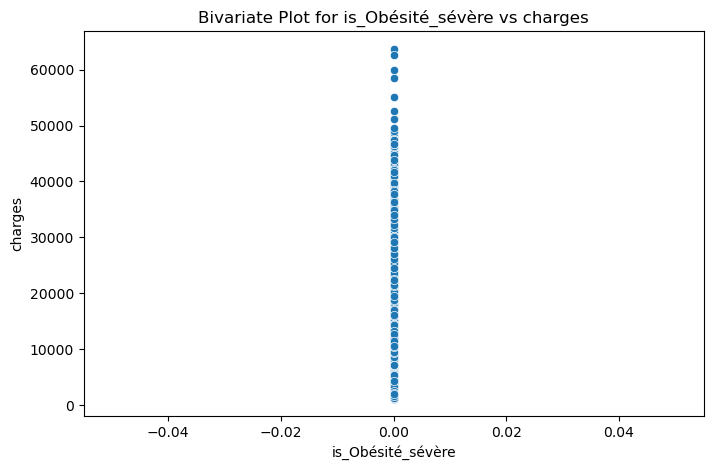

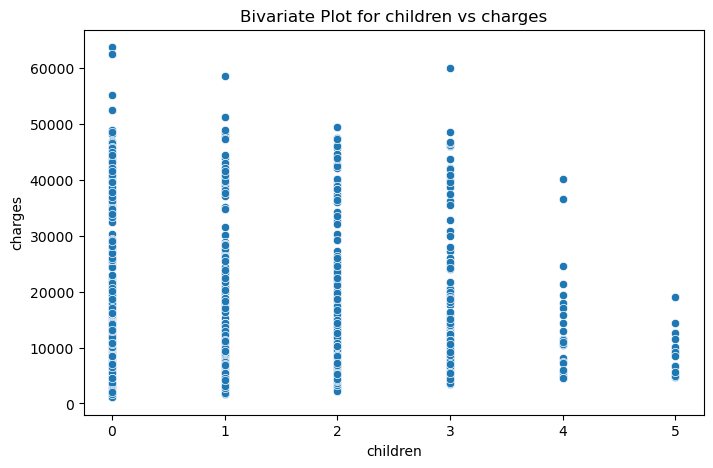

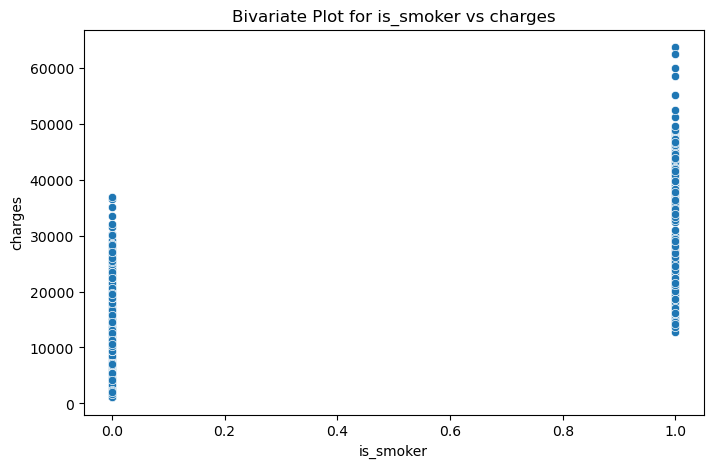

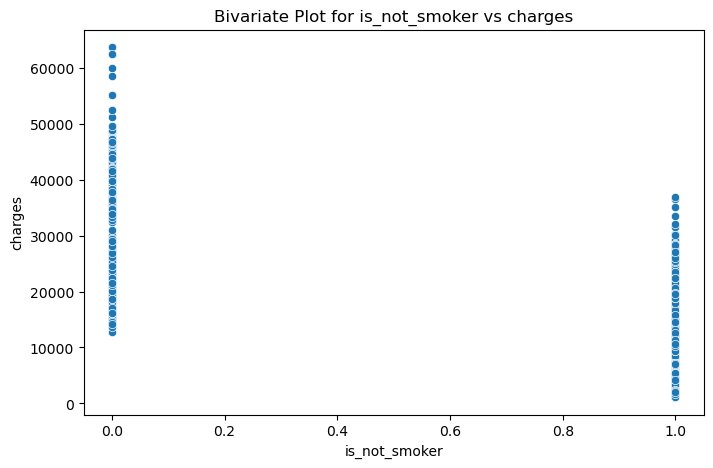

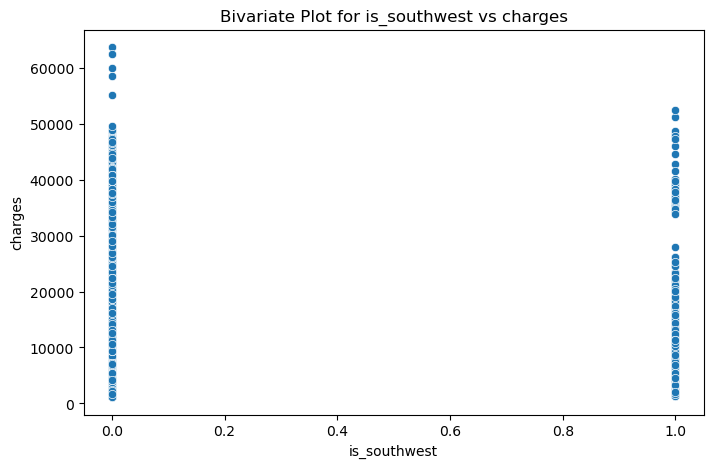

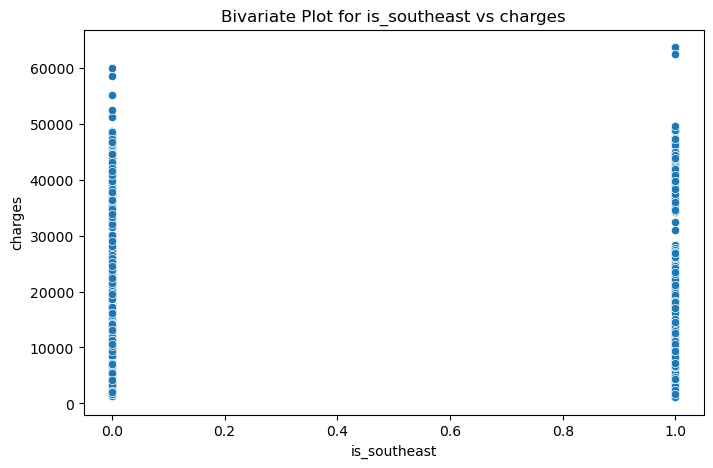

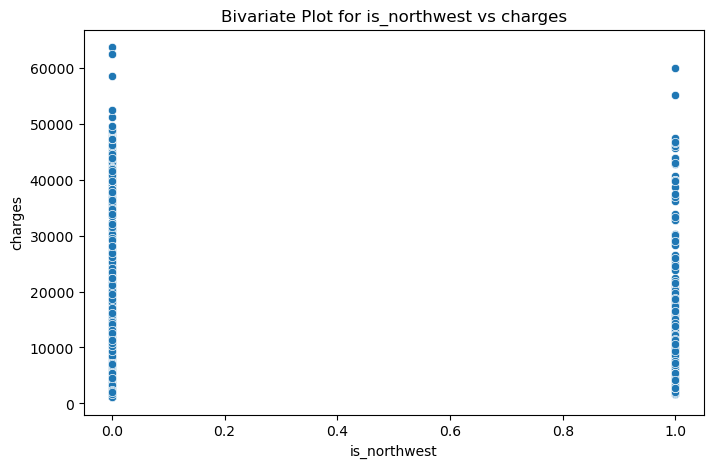

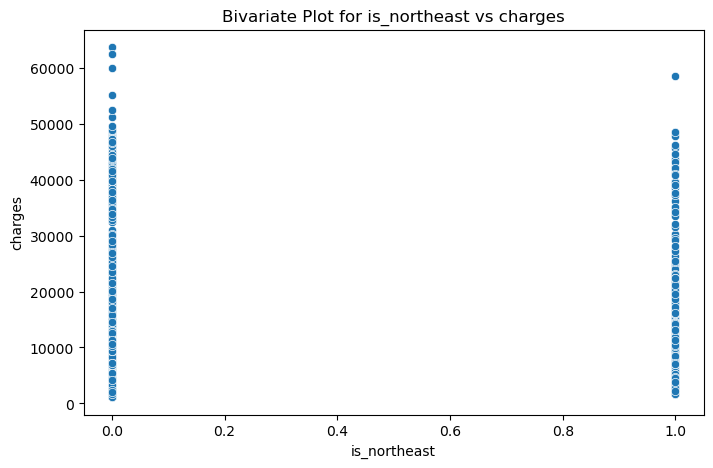

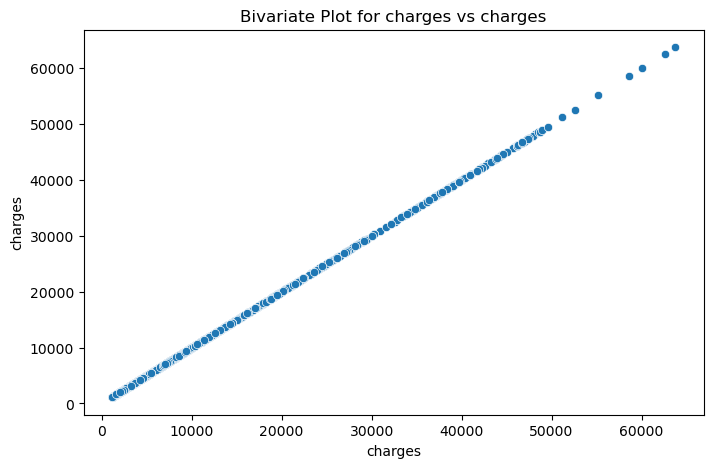

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bivariate(df, target, numeric_columns=None, categorical_columns=None):
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object']).columns

    for col in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y=target, data=df)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y=target, data=df)
        plt.title(f'Bivariate Plot for {col} vs {target.name}')
        plt.xlabel(col)
        plt.ylabel(target.name)
        plt.show()

# Assuming y_target is defined
y_target = df_clean['charges']

# Call the function
plot_bivariate(df_clean, y_target)